In [134]:
import itertools
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.random import randint
from random import random as rnd
from random import gauss, randrange

Here, I am just loading BLOSUM50 and 2 random sequences as test cases to make sure my functions work.

In [93]:
file_path = '/Users/SiSi/Documents/GitHub/BMI-203-HW3/BLOSUM50'
BLOSUM50 = np.loadtxt(file_path, dtype=int, comments='#', skiprows=7)
print(BLOSUM50)

[[ 5 -2 -1 -2 -1 -1 -1  0 -2 -1 -2 -1 -1 -3 -1  1  0 -3 -2  0 -2 -1 -1 -5]
 [-2  7 -1 -2 -4  1  0 -3  0 -4 -3  3 -2 -3 -3 -1 -1 -3 -1 -3 -1  0 -1 -5]
 [-1 -1  7  2 -2  0  0  0  1 -3 -4  0 -2 -4 -2  1  0 -4 -2 -3  4  0 -1 -5]
 [-2 -2  2  8 -4  0  2 -1 -1 -4 -4 -1 -4 -5 -1  0 -1 -5 -3 -4  5  1 -1 -5]
 [-1 -4 -2 -4 13 -3 -3 -3 -3 -2 -2 -3 -2 -2 -4 -1 -1 -5 -3 -1 -3 -3 -2 -5]
 [-1  1  0  0 -3  7  2 -2  1 -3 -2  2  0 -4 -1  0 -1 -1 -1 -3  0  4 -1 -5]
 [-1  0  0  2 -3  2  6 -3  0 -4 -3  1 -2 -3 -1 -1 -1 -3 -2 -3  1  5 -1 -5]
 [ 0 -3  0 -1 -3 -2 -3  8 -2 -4 -4 -2 -3 -4 -2  0 -2 -3 -3 -4 -1 -2 -2 -5]
 [-2  0  1 -1 -3  1  0 -2 10 -4 -3  0 -1 -1 -2 -1 -2 -3  2 -4  0  0 -1 -5]
 [-1 -4 -3 -4 -2 -3 -4 -4 -4  5  2 -3  2  0 -3 -3 -1 -3 -1  4 -4 -3 -1 -5]
 [-2 -3 -4 -4 -2 -2 -3 -4 -3  2  5 -3  3  1 -4 -3 -1 -2 -1  1 -4 -3 -1 -5]
 [-1  3  0 -1 -3  2  1 -2  0 -3 -3  6 -2 -4 -1  0 -1 -3 -2 -3  0  1 -1 -5]
 [-1 -2 -2 -4 -2  0 -2 -3 -1  2  3 -2  7  0 -3 -2 -1 -1  0  1 -3 -1 -1 -5]
 [-3 -3 -4 -5 -2 -4 -3 -4

In [94]:
sequence_path = '/Users/SiSi/Documents/GitHub/BMI-203-HW3/sequences/prot-0004.fa'
with open (sequence_path, "r") as file:
    seq_1=file.read()
    seq_1 = seq_1[seq_1.find("\n")+1:].replace('\n', '')
print(seq_1)

SLEAAQKSNVTSSWAKASAAWGTAGPEFFMALFDAHDDVFAKFSGLFSGAAKGTVKNTPEMAAQAQSFKGLVSNWVDNLDNAGALEGQCKTFAANHKARGISAGQLEAAFKVLSGFMKSYGGDEGAWTAVAGALMGEIEPDM


In [95]:
sequence_path = '/Users/SiSi/Documents/GitHub/BMI-203-HW3/sequences/prot-0008.fa'
with open (sequence_path, "r") as file:
    seq_2=file.read()
    seq_2 = seq_2[seq_2.find("\n")+1:].replace('\n', '')
print(seq_2)

ANKTRELCMKSLEHAKVDTSNEARQDGIDLYKHMFENYPPLRKYFKSREEYTAEDVQNDPFFAKQGQKILLACHVLCATYDDRETFNAYTRELLDRHARDHVHMPPEVWTDFWKLFEEYLGKKTTLDEPTKQAWHEIGREFAKEINK


In the cell below, I'm written a function that will load both my substitution matrix (which is called sim_matrix because I was confused inititally) as well as an index that matches a given amino acid in a sequence to its proper index in the substitution matrix.

In [96]:
def load_sim_matrix(name):
    pathway = os.path.join('.', name) #on Github, needs to be changed to '..'
    if name == 'BLOSUM50' or name == 'BLOSUM62':
        sim_matrix = np.loadtxt(os.path.abspath(pathway), dtype=int, comments='#', skiprows=7)
    elif name == 'MATIO':
        sim_matrix = np.loadtxt(os.path.abspath(pathway), dtype=int, comments='#', skiprows=3)
    else:
        sim_matrix = np.loadtxt(os.path.abspath(pathway), dtype=int, comments='#', skiprows=10)
        
    AA_list = ["A", "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L", "K", 
           "M", "F", "P", "S", "T", "W", "Y", "V", "B", "Z", "X", "x"]
    similarity_matrix_index = {}
    for i, aa in enumerate(AA_list):
        similarity_matrix_index[aa] = i
    
    return sim_matrix, similarity_matrix_index
    

In [97]:
BLOSUM50, BLOSUM50_i = load_sim_matrix("BLOSUM50")

In [7]:
print(load_sim_matrix("MATIO"))

(array([[ 0,  1,  1, -6, -2,  8, -7,  4, -6, -1, -1,  4,  1,  2, -1, -8,
         7,  7,  4, -8, -1,  8, -1,  9],
       [ 1, -1,  1, -4, -5,  3,  2,  3,  1,  0, -7, -2, -9,  8, -7,  2,
        -4, -4,  2,  0,  0,  6, -7,  8],
       [ 1,  1, -6,  1,  5,  2,  4, -3, -5, -8,  8,  9,  4,  7,  8,  1,
        -2, -7,  4,  1,  1,  0,  7,  0],
       [-6, -4,  1,  6,  0,  0,  0, -8, -9,  5, -9,  3,  6,  7,  9, -9,
         4,  0,  6,  5, -2,  3,  4,  0],
       [-2, -5,  5,  0, -2,  2,  1,  2, -2,  2,  0, -6,  3, -1, -7,  3,
        -4,  7, -3, -1,  8,  1,  3,  9],
       [ 8,  3,  2,  0,  2, -2, -4,  4,  5,  3, -3,  4,  6, -4, -9,  1,
         5,  1, -7,  4,  2,  4,  0, -7],
       [-7,  2,  4,  0,  1, -4, -6,  5,  9,  0, -1, -4,  3,  5,  3,  6,
        -6,  6,  6, -1, -8,  5,  3, -9],
       [ 4,  3, -3, -8,  2,  4,  5,  0,  2, -7, -8,  2, -4,  9,  3, -4,
         5, -9,  5, -2,  8, -5,  9, -7],
       [-6,  1, -5, -9, -2,  5,  9,  2,  7,  5, -4, -8, -4,  3,  8,  0,
         1, -7, -1,  0,

In [99]:
PAM250, PAM250_index = load_sim_matrix("PAM250")

For the first part of my algorithm, I have to create a matrix that basically tracks the score or alignment of two sequences based on the ones before it.

In [98]:
def matrix(a, b, match_score_similarity_matrix, similarity_matrix_index, GOC, EP):
    H = np.zeros((len(a) + 1, len(b) + 1), np.int) #initializing matrix
    flag = 0 #initialize flag to zero (no gap has been created yet)

    for i, j in itertools.product(range(1, H.shape[0]), range(1, H.shape[1])): #going through every cellin the matrix
        match = H[i - 1, j - 1] + match_score_similarity_matrix[similarity_matrix_index[a[i-1]], similarity_matrix_index[b[j-1]]] #if AAs align, return score based on similarity matrix
        if flag == 0: #assuming that there's no gap being built so would use gap opening cost
            delete = H[i - 1, j] - GOC #If choose to instead "delete" or skip over, then will go one to left and also have a penalty cost
            insert = H[i, j - 1] - GOC #If choose to instead "insert" (skipping over on other strand), then will be moving on the vertical axis with a penalty
        else: #assumes that there is a gap so need to use extension penalty instead
            delete = H[i - 1, j] - EP #If choose to instead "delete" or skip over, then will go one to left and also have a penalty cost
            insert = H[i, j - 1] - EP
        H[i, j] = max(match, delete, insert) #Whichever of the above 3 options is best/optimal, will be picked.
        if H[i,j] == match:
            flag = 0 #if aligned, then there is still no gap created
        else: flag = 1 #gap has been started and continuation penalty should be used instead of start penalty
        if H[i,j] < 0: H[i,j] = 0 #if negative, will instead return 0 because that's how S-WW works
    return H

In [100]:
matrix('ARN','ARN',BLOSUM50, BLOSUM50_i, 2, 3)

array([[ 0,  0,  0,  0],
       [ 0,  5,  3,  0],
       [ 0,  2, 12, 10],
       [ 0,  0, 10, 19]])

In [101]:
score_matrix = matrix(seq_1, seq_2, BLOSUM50, BLOSUM50_i, 2, 3)
print(score_matrix)

[[  0   0   0 ...   0   0   0]
 [  0   1   1 ...   0   1   0]
 [  0   0   0 ...   2   0   0]
 ...
 [  0   0   0 ... 158 160 162]
 [  0   0   2 ... 156 160 160]
 [  0   0   0 ... 155 158 158]]


In [102]:
score_matrix = matrix(seq_1, seq_2, PAM250, PAM250_index, 10, 2)
print(score_matrix)

[[ 0  0  0 ...  0  0  0]
 [ 0  1  1 ...  0  1  0]
 [ 0  0  0 ...  2  0  0]
 ...
 [ 0  1  0 ... 52 50 59]
 [ 0  0  3 ... 42 54 50]
 [ 0  0  0 ... 47 44 54]]


In [103]:
def traceback(H, b, b_='', old_i=0):
    H_flip = np.flip(np.flip(H, 0), 1) #flip H to get the *last* (as in bottom right) occurrence of H.max() instead of top left
    i_, j_ = np.unravel_index(H_flip.argmax(), H_flip.shape)
    i, j = np.subtract(H.shape, (i_ + 1, j_ + 1))  #(i, j) equal the *last* indexes of H.max()/highest score in matrix
    if H[i, j] == 0: #terminating condition--which happens once you hit zero
        return b_, j
    b_ = b[j - 1] + '-' + b_ if old_i - i > 1 else b[j - 1] + b_ #Otherwise, add gap to sequence if True; otherwise, add aligned AA
    return traceback(H[0:i, 0:j], b, b_, i)

In [17]:
string, number = traceback(score_matrix, seq_2)

In [18]:
len(string)

45

Traceback function above just returns the actual alignment; I also need this to give me the score of the alignment

In [104]:
def score(H):
    H_flip = np.flip(np.flip(H, 0), 1)
    return H_flip.max()

In [105]:
score(score_matrix)

60

In [21]:
# for f in neg_pairs_filelist:
#     a, b = return_sequences(*f)
    

NameError: name 'neg_pairs_filelist' is not defined

Here, I built a pipeline to determine the threshold to give me a TPR of a certain value (for Q1, 0.7). Then, I wrote another function that tells me the FPR for that threshold.

In [106]:
def return_sequences(sequence_a_path, sequence_b_path):
    with open (sequence_a_path, "r") as file:
        a = file.read()
        a = a[a.find("\n")+1:].replace('\n', '')
    with open (sequence_b_path, "r") as file:
        b = file.read()
        b = b[b.find("\n")+1:].replace('\n', '')
    return a, b #the two sequences I am going to compare/align using Smith-Waterman

In [107]:
BLOSUM50, BLOSUM50_i = load_sim_matrix('BLOSUM50')

In [108]:
neg_pairs_filelist = []
with open('./Negpairs.txt', mode='r') as my_file:
    for line in my_file:
        neg_pairs_filelist.append(line.strip().split(' '))

In [109]:
a, b = return_sequences(*neg_pairs_filelist[0])

In [110]:
print(a)
print(b)

SQAEFDKAAEEVKHLKTKPADEEMLFIYSHYKQATVGDINTERPGMLDFKGKAKWDAWNELKGTSKEDAMKAYIDKVEELKKKYGI
AVSLDRTRAVFDGSEKSMTLDISNDNKQLPYLAQAWIENENQEKIITGPVIATPPVQRLDPGAKSMVRLSTTPDISKLPQDRESLFYFNLREIPPRSEKANVLQIALQTKIKLFYRPAA


In [14]:
neg_pairs_scores = []
for f in neg_pairs_filelist:
    #print(f)
    a, b = return_sequences(*f)
    score_matrix = matrix(a, b, BLOSUM50, BLOSUM50_i, 3, 2)
    neg_pairs_scores.append(score(score_matrix))

In [29]:
neg_pairs_scores

[96,
 89,
 51,
 180,
 99,
 103,
 197,
 43,
 99,
 49,
 191,
 58,
 110,
 211,
 143,
 136,
 91,
 72,
 58,
 271,
 273,
 101,
 96,
 236,
 234,
 103,
 169,
 183,
 262,
 118,
 309,
 187,
 128,
 129,
 87,
 109,
 63,
 154,
 112,
 77,
 50,
 73,
 191,
 164,
 278,
 78,
 74,
 34,
 66,
 117]

In [111]:
pos_pairs_filelist = []
with open('./Pospairs.txt', mode='r') as my_file:
    for line in my_file:
        pos_pairs_filelist.append(line.strip().split(' '))

In [16]:
pos_pairs_scores = []
for f in pos_pairs_filelist:
    a, b = return_sequences(*f)
    score_matrix = matrix(a, b, BLOSUM50, BLOSUM50_i, 2, 5)
    pos_pairs_scores.append(score(score_matrix))
pos_pairs_scores = np.array(pos_pairs_scores)
print(pos_pairs_scores)

[142 143 144 141 201  66 326  94 109  95 124 131 259 176 174 162 146 344
 259 338 343 253 223 206 143 170 297 214 151 137 187 180 150 202 293 143
 269 178 183 122 117 138 117 247 243 160 362 415 122  98]


In [112]:
def return_threshold(similarity_matrix, GOC, EP, goal_TPR):
    pos_pairs_scores = []
    for f in pos_pairs_filelist:
        a, b = return_sequences(*f)
        score_matrix = matrix(a, b, similarity_matrix, BLOSUM50_i, GOC, EP) #calculates the score matrix for two sequences
        pos_pairs_scores.append(score(score_matrix)) #finds the score from the score matrix and appends to list
    pos_pairs_scores = np.array(pos_pairs_scores) #sorts list of scores in ascending order
    threshold = np.sort(pos_pairs_scores)[int(49 * (1 - goal_TPR))] #picks threshold as the score based on desired TPR
    return threshold

In [40]:
t = return_threshold(BLOSUM50, 2, 5, 0.7)
t

142

In [41]:
#checking I do get a TPR of 0.7
(np.array(pos_pairs_scores) > t).mean()

0.7

In [113]:
def find_FPR(threshold, similarity_matrix, GOC, EP):
    neg_pairs_scores = []
    for f in neg_pairs_filelist:
        a, b = return_sequences(*f)
        score_matrix = matrix(a, b, similarity_matrix, BLOSUM50_i, GOC, EP) #note all similarity matrix indices are the same
        neg_pairs_scores.append(score(score_matrix))
    FPR = (np.array(neg_pairs_scores) > threshold).mean()
    return FPR
    

In [50]:
FPR_list = []
for GOC in range(1,21):
    for EP in range(1,6):
        threshold = return_threshold(BLOSUM50, GOC, EP, 0.7)
        FPR = find_FPR(threshold, BLOSUM50, GOC, EP)
        FPR_list.append(FPR)
print(FPR_list)

[0.38, 0.38, 0.36, 0.34, 0.34, 0.36, 0.34, 0.34, 0.32, 0.3, 0.36, 0.34, 0.32, 0.3, 0.28, 0.32, 0.34, 0.28, 0.28, 0.26, 0.32, 0.34, 0.32, 0.28, 0.3, 0.32, 0.28, 0.3, 0.3, 0.26, 0.32, 0.34, 0.24, 0.28, 0.3, 0.3, 0.26, 0.3, 0.3, 0.3, 0.32, 0.28, 0.28, 0.28, 0.26, 0.32, 0.26, 0.26, 0.2, 0.22, 0.28, 0.28, 0.26, 0.24, 0.24, 0.36, 0.2, 0.28, 0.22, 0.32, 0.32, 0.32, 0.34, 0.28, 0.28, 0.26, 0.28, 0.24, 0.28, 0.26, 0.28, 0.24, 0.28, 0.36, 0.38, 0.3, 0.26, 0.36, 0.38, 0.36, 0.32, 0.24, 0.34, 0.34, 0.34, 0.4, 0.34, 0.34, 0.32, 0.36, 0.36, 0.32, 0.32, 0.32, 0.36, 0.28, 0.34, 0.32, 0.32, 0.36]


In [53]:
print(min(FPR_list))
print(np.array(FPR_list).argmin())

0.2
48


In [64]:
#double-checking that I have the right GOC and EP combination:
t = return_threshold(BLOSUM50, 10, 4, 0.7)
FPR = find_FPR(t, BLOSUM50, 10, 4)
print(FPR)

0.2


The lowest FPR was 0.2, which corresponds to a gap opening cost of 10 and elimination penalty of 4. Note there is another combination that gets me another FPR of 0.2, but I decided to utilize the first combination that gave me 0.2 for the rest of the assignment.

Next, I will try finding the FPR for each matrix with this gap cost combination.

In [114]:
BLOSUM50, similarity_matrix_index = load_sim_matrix('BLOSUM50')
BLOSUM62, similarity_matrix_index = load_sim_matrix('BLOSUM62')
MATIO, similarity_matrix_index = load_sim_matrix('MATIO')
PAM100, similarity_matrix_index = load_sim_matrix('PAM100')
PAM250, similarity_matrix_index = load_sim_matrix('PAM250')

In [66]:
FPR_list_matrix = []
for sim_matrix in [BLOSUM50, BLOSUM62, MATIO, PAM100, PAM250]:
    threshold = return_threshold(sim_matrix, 10, 4, 0.7)
    FPR = find_FPR(threshold, sim_matrix, 10, 4)
    FPR_list_matrix.append(FPR)
print(FPR_list_matrix)

[0.2, 0.24, 0.38, 0.24, 0.3]


With the best gap penalty combination, BLOSUM50 appeared to perform the best (i.e. had the lowest FPR with a TPR of 0.7).
    
BLOSUM50 had a FPR of 0.2.

BLOSUM62 had a FPR of 0.24.

MATIO had a FPR of 0.38.

PAM100 had a FPR of 0.24.

PAM250 had a FPR of 0.3.

In [ ]:
#ROC Curves

In [21]:
ROC_TPR = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [22]:
#BLOSUM50
BLOSUM50_FPR = []
for goal_TPR in ROC_TPR:
    threshold = return_threshold(BLOSUM50, 10, 4, goal_TPR)
    FPR = find_FPR(threshold, BLOSUM50, 10, 4)
    BLOSUM50_FPR.append(FPR) 
print(BLOSUM50_FPR)

[0.0, 0.0, 0.02, 0.02, 0.04, 0.06, 0.12, 0.2, 0.32, 0.56, 0.78]


In [23]:
#BLOSUM62
BLOSUM62_FPR = []
for goal_TPR in ROC_TPR:
    threshold = return_threshold(BLOSUM62, 10, 4, goal_TPR)
    FPR = find_FPR(threshold, BLOSUM62, 10, 4)
    BLOSUM62_FPR.append(FPR) 
print(BLOSUM62_FPR)

[0.0, 0.02, 0.02, 0.08, 0.08, 0.14, 0.2, 0.24, 0.42, 0.54, 0.68]


In [24]:
#MATIO
MATIO_FPR = []
for goal_TPR in ROC_TPR:
    threshold = return_threshold(MATIO, 10, 4, goal_TPR)
    FPR = find_FPR(threshold, MATIO, 10, 4)
    MATIO_FPR.append(FPR) 
print(MATIO_FPR)

[0.0, 0.0, 0.1, 0.14, 0.22, 0.3, 0.34, 0.38, 0.44, 0.68, 0.96]


In [25]:
#PAM100
PAM100_FPR = []
for goal_TPR in ROC_TPR:
    threshold = return_threshold(PAM100, 10, 4, goal_TPR)
    FPR = find_FPR(threshold, PAM100, 10, 4)
    PAM100_FPR.append(FPR) 
print(PAM100_FPR)

[0.0, 0.0, 0.02, 0.02, 0.02, 0.06, 0.1, 0.24, 0.26, 0.54, 0.82]


In [26]:
#PAM250
PAM250_FPR = []
for goal_TPR in ROC_TPR:
    threshold = return_threshold(PAM250, 10, 4, goal_TPR)
    FPR = find_FPR(threshold, PAM250, 10, 4)
    PAM250_FPR.append(FPR) 
print(PAM250_FPR)

[0.0, 0.0, 0.0, 0.0, 0.02, 0.04, 0.1, 0.3, 0.34, 0.46, 0.88]


<Figure size 360x360 with 0 Axes>

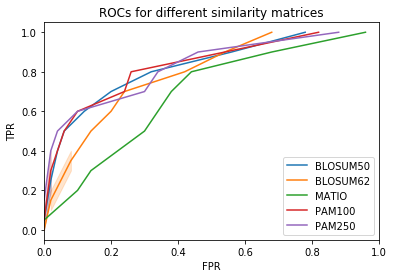

<Figure size 360x360 with 0 Axes>

In [27]:
sns.lineplot(x=BLOSUM50_FPR, y=ROC_TPR, label="BLOSUM50")
sns.lineplot(x=BLOSUM62_FPR, y=ROC_TPR, label="BLOSUM62")
sns.lineplot(x=MATIO_FPR, y=ROC_TPR, label="MATIO")
sns.lineplot(x=PAM100_FPR, y=ROC_TPR, label="PAM100")
sns.lineplot(x=PAM250_FPR, y=ROC_TPR, label="PAM250")
plt.title("ROCs for different similarity matrices")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.xlim(0,1)
#plt.axis('equal')
plt.figure(figsize=(5,5))

I am now writing new functions and remaking ROC curves to address Part 1, Q3 about normalization.

In [35]:
def normalized_threshold(similarity_matrix, GOC, EP, goal_TPR):
    pos_pairs_scores = []
    for f in pos_pairs_filelist:
        a, b = return_sequences(*f)
        score_matrix = matrix(a, b, similarity_matrix, BLOSUM50_i, GOC, EP)
        pos_pairs_scores.append(normalized_score(score_matrix, a, b))
    pos_pairs_scores = np.array(pos_pairs_scores)
    threshold = np.sort(pos_pairs_scores)[int(49 * (1 - goal_TPR))]
    return threshold

In [29]:
def normalized_score(H,a,b):
    return H.max()/min(len(a), len(b))

In [36]:
def normalized_FPR(threshold, similarity_matrix, GOC, EP):
    neg_pairs_scores = []
    for f in neg_pairs_filelist:
        a, b = return_sequences(*f)
        score_matrix = matrix(a, b, similarity_matrix, BLOSUM50_i, GOC, EP) #note all similarity matrix indices are the same
        neg_pairs_scores.append(normalized_score(score_matrix, a, b))
    FPR = (np.array(neg_pairs_scores) > threshold).mean()
    return FPR

In [38]:
#BLOSUM50 with normalized scores
BLOSUM50_FPR_norm = []
for goal_TPR in ROC_TPR:
    threshold = normalized_threshold(BLOSUM50,10, 4, goal_TPR)
    FPR = normalized_FPR(threshold, BLOSUM50,10, 4)
    BLOSUM50_FPR_norm.append(FPR) 
print(BLOSUM50_FPR_norm)

[0.0, 0.02, 0.22, 0.42, 0.48, 0.52, 0.66, 0.82, 0.9, 0.96, 1.0]


<Figure size 1440x1440 with 0 Axes>

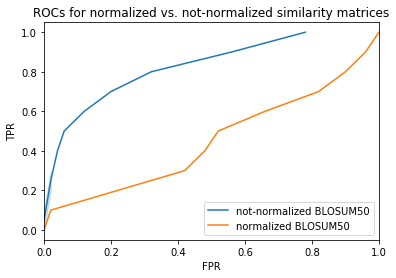

<Figure size 1440x1440 with 0 Axes>

In [39]:
sns.lineplot(x=BLOSUM50_FPR, y=ROC_TPR, label="not-normalized BLOSUM50")
sns.lineplot(x=BLOSUM50_FPR_norm, y=ROC_TPR, label="normalized BLOSUM50")
plt.title("ROCs for normalized vs. not-normalized similarity matrices")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.xlim(0,1)
#plt.axis('equal')
plt.figure(figsize=(20,20))

The performance appears to get worse if we normalize the Smith-Waterman scores.

Looking at the ROC curve particularly, the normalized BLOSUM62 appears to have the same performance as a random algorithm. The false positive rates indeed are much higher (and thus worse) for the normalized rather than the non-normalized. This may occur because you'd generally expect it to be harder to get good sequence alignments from very short sequences. By taking away the "penalty" or differntatiation for having a short sequence, your algorithm is going to perform much worse.

https://web.stanford.edu/class/cs262/presentations/lecture2.pdf
https://github.com/applied-bioinformatics/An-Introduction-To-Applied-Bioinformatics/blob/master/book/fundamentals/pairwise-alignment.md

## Part 2

The first thing I am doing is saving a list of all my static alignments using BLOSUM62 with a gap opening cost of 10 and an extension penalty of 4.

In [115]:
#Positive Pairs
pos_pairs_alignments = []
for f in pos_pairs_filelist:
    a, b = return_sequences(*f)
    score_matrix = matrix(a, b, BLOSUM50, BLOSUM50_i, 10, 4)
    alignment, number = traceback(score_matrix, b)
    pos_pairs_alignments.append(alignment)
print(pos_pairs_alignments)

['SLE-AK-R-Y-Y-N-P-A-QGQKI-LA-V', 'A-ED-AV-R-SAL-SP-P-QIK-G-EG-A-I-FKQK-Q', 'K-L-LEHILN-INN-K-T-K-T-E-C-LI', 'GAQ-N-C-ACH-G-NS-A-D-GGF-G-AMP-EIQAV', 'LND-Q-F-F-F-D-DGSI-DF-M-D-D-SWEEYL-M', 'G-KRK-R-GLGAS-ISKT', 'P-RT-ED-LHDAMV-D-G-PTLIQ-P-N-YQ-EP-P-P-N-Q-M-IG-W', 'EKV-AAK-F-NHSKF-D', 'F-PE-CSTT-F-D-G', 'P-PT-IAW-D-NFKV-GR-Q-Q-L', 'PD-P-I-WE-QYK-W-TS-RV', 'P-T-LCA-F-Q-G-VHV-D-E-E', 'I-GEA-T-G-ITLQ-CVH-AS-V-GSA-V-S-GKS-C-G-S', 'V-D-FLG-W-K-MT-K-H-S-D-T-G-K-V-D-L-T-E', 'DEGGM-F-PA-PGDSI-F-NV-GAD-K-TVGQE-VK-E-F-CAPH-GMVA-VVVG', 'MFQTF-N-K-T-P-I-V-L', 'KAI-K-AW-GC-A-I-L-N-SSER-P-G-N-KD-S', 'F-R-P-A-P-TD-RF-DT-T-L-T-Y-S-TAYNAL-P-A', 'EN-SQDT-TVHDG-P-S-LA-G-R-G-F-A-P-V-V-PTSS', 'RYA-IG-C-Y-V-P-SW-L-T-GN-NR-D-HY-GK-C-R-M-VG-FQ-P-I-DQ-IK-E', 'D-GS-PY-NS-S-F-WG-V-N-QNL-G-KQH-WE-E-D-G', 'ME-N-L-DRR-F-PFVT-P-ID-Q-AV-GA-IV', 'A-VKV-Y-L-GK-T-ERIL-YT-H-AA-M-F-D-Q-V-IRK-VF-K-VQL-D-V-D', 'A-KG-F-T-P-VN-V-TI-Y-DID-IL-ARQ-F-NK-DM-M', 'PY-I-YF-VRG-RMLL-DQGWKEE-DGD-QSNAILRHLGRS', 'LD-G-G-IRQV-S-KV-R-I-YGV-

In [116]:
#Negative Pairs
neg_pairs_alignments = []
for f in neg_pairs_filelist:
    a, b = return_sequences(*f)
    score_matrix = matrix(a, b, BLOSUM50, BLOSUM50_i, 10, 4)
    alignment, number = traceback(score_matrix, b)
    neg_pairs_alignments.append(alignment)
print(neg_pairs_alignments)

['S-A-FD-EK-P-F-YN-RE-LQI-K', 'EP-CAG-H-G', 'NLEEV-KL-C-LVR-I', 'P-DSQ-IK-L-NVM-L-D-L', 'IE-K-C-C-GA-N-R-A-I-G-KC', 'P-G-V-SD-D-VV-G-RQ-KPGQS-L-A', 'ANHIISI-LNLV-F-E-LS-F-FSDS-L-K-SG-D-F-ET-Q', 'VEE-N-L-NQT-K', 'QR-GKK-WSNAG-P', 'DA-Q-IQ-V-SA-T', 'A-AP-D-A-GG-FFH-GS-HT-SS-G-S', 'PT-L-G-D-R', 'S-T-Q-GK-F-AL-I', 'M-ITQQA-PQV-AS-G-L-T-T-VA-PGD-DG-I-A-E-Y-K-GL', 'TPIE-L-D-E-WKITMNDGST-DL', 'F-LGDG-SFST-RG-W-E-G-SSL', 'MD-S-S-S-YS-NG-G-PY-V-D', 'MK-PVT-L-DVAE-S-QT-VNQ', 'P-FG-DA-IVL', 'KY-PQT-SG-FQ-G-GI-KIK-IG-P-E-Y-A', 'MRLG-D-LE-D-A-DSVAA-G-AAR-G-AV', 'METR-V-Y-WS-FFK-Q-EVG-MK', 'ID-GH-VDSL-V-C-Q-C-G-K-L', 'FVPGQ-ET-AE-G-D-G-E-A-VEM-G-F-P', 'QQ-I-G-G-G-VGC-PSA-Q-K-H-G-V-G-P', 'A-KP-I-Y-WI-KF', 'T-N-AA-VD-Y-V-EEV-AA-DA-A-L', 'Y-N-A-D-V-DL-RG-Q-K-FI-V-G-L-L-A-VA-LS', 'M-RL-PLT-AE-RIN-PFV-G-GQV-KHV', 'ER-VL-G-Q-RS-D-KRLA-HAQT-D-WA', 'M-QNI-GN-A-D-RA-L-G-F-DAI-SAV-DK-E-M-LAANGD', 'MKT-RI-N-F-A-D-ELV-V', 'AL-RVR-G-DL-G-P-G', 'ANNLF-SNGVSQ-AIL-VF-PSA-KHG', 'ML-LNS-E-RG-W', 'KR-V-ELER-Q-PEREH-P-

Now, I'm writing a new function that gives me the score for a given alignment based on a given sim_matrix (which, remember, is actually the substitution/score matrix).

In [161]:
def aligned_seq_score(alignment, match_score_similarity_matrix, similarity_matrix_index):
    score = 0
    flag = 0
    for character in alignment:
        if character == '-' and flag == 0: #it's the beginning of a gap
            added_value = -10 #give it gap opening penalty
            score = score + added_value
            flag = 1 #show we're now in the midst of a gap
        elif character == '-' and flag == 1: #we're in the middle of a gap
            added_value = -4 #give it extension penalty
            score = score + added_value
            flag = 1 #show we're still in the midst of a gap
        else: #in this case, we have a non-gap alignment, so give it the score specified in the similarity matrix
            added_value = match_score_similarity_matrix[similarity_matrix_index[character], similarity_matrix_index[character]]
            score = score + added_value
            flag = 0 #we're not in a gap
    return score

I have a clear problem--my aligned_seq_score and score function for my matrix don't return the same values. I have spent a lot of time trying to debug it, but cannot. Therefore, I will use this flawed score function for the rest of my homework, accepting that the rest of my answers may not be valid due to this discrepancy.

In [162]:
aligned_seq_score(neg_pairs_alignments[3], BLOSUM50, BLOSUM50_i)

13

In [119]:
a, b = return_sequences(*neg_pairs_filelist[3])
score_matrix = matrix(a, b, BLOSUM50, BLOSUM50_i, 10, 4)
score(score_matrix)

38

Now that I have the "score" of each alignment, I will write a function to tell me the value of my "objective function" for that alignment is.

In [124]:
def return_threshold_FPR(similarity_matrix, goal_FPR):
    neg_pairs_scores = []
    for alignment in neg_pairs_alignments:
        score = aligned_seq_score(alignment, similarity_matrix, BLOSUM50_i) #calculates the score matrix for two sequences
        neg_pairs_scores.append(score) #finds the score from the score matrix and appends to list
    neg_pairs_scores = np.array(neg_pairs_scores)
    threshold = np.sort(neg_pairs_scores)[int(49 * (1 - goal_FPR))] #picks threshold as the score based on desired TPR
    return threshold

In [129]:
def find_TPR(threshold, similarity_matrix):
    pos_pairs_scores = []
    for alignment in pos_pairs_alignments:
        score = aligned_seq_score(alignment, similarity_matrix, BLOSUM50_i) #note all similarity matrix indices are the same
        pos_pairs_scores.append(score)
    TPR = (np.array(pos_pairs_scores) > threshold).mean()
    return TPR

In [130]:
def obj_value(sim_matrix):
    TPRs = []
    for goal_FPR in [0.0, 0.1, 0.2, 0.3]:
        threshold = return_threshold_FPR(sim_matrix, goal_FPR)
        TPR = find_TPR(threshold, sim_matrix)
        TPRs.append(TPR)
    TPRs = np.array(TPRs)
    sum_TPR = TPRs.sum()
    return sum_TPR
        

In [131]:
obj_value(BLOSUM50)

1.12

For my optimization algorithm, I will be using a genetic algorithm with the goal of maximizing by obj_value (whose maximum value is 4).

In this case, my parameters will be particular cells within my matrix. Since my aligned_seq_score function only takes into account the diagnol, I will specifically focus on changing the values of the twenty values making up this diagnol. As such, I am experimenting with twenty different parameters, which I will name after the amino acids each diagnol corresponds to.

For each diagnol (=chromosome), I will say it can 

Score = score + (corresponding diagnol value) --> this means that the partial derivative wrt diagnol value is simply 1.

So update is:
parameter = parameter - 0.01 [learning rate] * 1

In [169]:
#the values that that make up my whole diagnol, i.e. individual[1] equals value in the first diagnol value
def possible_matrix(number_of_genes, upper_limit, lower_limit):
    sim_matrix = np.zeros((len(similarity_matrix_index),len(similarity_matrix_index))) #initialize new matrix
    individual=[round(rnd()*(upper_limit-lower_limit)
                +lower_limit,1) for x in range(number_of_genes)]
    for i, character in enumerate(similarity_matrix_index):
        sim_matrix[similarity_matrix_index[character], similarity_matrix_index[character]] = individual[i]
      
    return sim_matrix

In [170]:
possible_matrix(len(similarity_matrix_index), 0, 10)

array([[2.7, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 3.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 9.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 8.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 3.9, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. 

In [ ]:
for 

In [143]:
#each individual in a population is a possible solution that might get me a better answer

def population(number_of_individuals,
               number_of_genes, upper_limit, lower_limit):
    return [individual(number_of_genes, upper_limit, lower_limit) 
        for x in range(number_of_individuals)]

In [147]:
population(20, len(similarity_matrix_index), 0, 10)

[[3.1,
  8.2,
  4.2,
  9.9,
  3.8,
  9.2,
  7.0,
  4.8,
  2.0,
  3.6,
  1.5,
  0.4,
  4.5,
  2.4,
  6.4,
  7.9,
  9.6,
  5.2,
  2.3,
  2.6,
  9.8,
  2.9,
  9.7,
  3.7],
 [9.5,
  0.4,
  4.5,
  0.7,
  2.4,
  3.1,
  6.5,
  3.5,
  4.5,
  6.4,
  3.2,
  6.1,
  0.9,
  5.5,
  2.1,
  0.5,
  5.3,
  1.7,
  4.1,
  1.3,
  1.5,
  8.6,
  2.7,
  9.0],
 [4.1,
  3.1,
  6.0,
  4.5,
  9.5,
  1.0,
  8.7,
  4.6,
  3.5,
  1.3,
  2.2,
  9.6,
  4.9,
  8.2,
  8.0,
  6.1,
  4.9,
  6.5,
  5.7,
  0.4,
  1.8,
  4.1,
  4.1,
  0.3],
 [0.6,
  6.8,
  1.3,
  7.8,
  7.3,
  9.9,
  0.8,
  0.5,
  5.9,
  5.5,
  3.3,
  1.4,
  7.6,
  5.0,
  8.1,
  5.9,
  6.5,
  6.2,
  8.2,
  1.5,
  7.3,
  2.4,
  9.0,
  4.4],
 [4.9,
  6.7,
  4.5,
  6.1,
  5.7,
  5.0,
  1.0,
  1.2,
  5.6,
  0.6,
  1.5,
  1.1,
  0.3,
  5.7,
  10.0,
  9.1,
  2.8,
  6.4,
  6.4,
  0.2,
  7.3,
  8.7,
  3.6,
  10.0],
 [4.7,
  2.3,
  4.5,
  2.9,
  3.5,
  3.7,
  5.2,
  3.2,
  2.4,
  1.9,
  6.1,
  3.2,
  1.5,
  4.5,
  3.4,
  0.3,
  6.1,
  2.5,
  0.9,
  4.8,
  5.6,
  8.2,

In [ ]:
#fitness calculation is my obj_value --note each row in population are values a particular diagnol can take

In [148]:
def selection(generation):
    selected_individuals = [generation['Individuals'][-x-1]
        for x in range(int(len(generation['Individuals'])//2))]
    selected_fitnesses = [generation['Fitness'][-x-1]
        for x in range(int(len(generation['Individuals'])//2))]
    selected = {'Individuals': selected_individuals,
                    'Fitness': selected_fitnesses}
    return selected

In [149]:
selection(1)

TypeError: 'int' object is not subscriptable

In [150]:
def pairing(elit, selected):
    individuals = [elit['Individuals']]+selected['Individuals']
    fitness = [elit['Fitness']]+selected['Fitness']
    parents = [[individuals[x],individuals[x+1]] 
                for x in range(len(individuals)//2)]

    return parents

In [158]:
def mating(parents, method='Single Point'):

    pivot_point = randint(1, len(parents[0]))
    offsprings = [parents[0] \
            [0:pivot_point]+parents[1][pivot_point:]]
    offsprings.append(parents[1]
            [0:pivot_point]+parents[0][pivot_point:])

    return offsprings

In [159]:
def mutation(individual, upper_limit, lower_limit, muatation_rate=2, 
    method='Reset', standard_deviation = 0.001):
    gene = [randint(0, 7)]
    for x in range(muatation_rate-1):
        gene.append(randint(0, 7))
        while len(set(gene)) < len(gene):
            gene[x] = randint(0, 7)
    mutated_individual = individual.copy()
    if method == 'Gauss':
        for x in range(muatation_rate):
            mutated_individual[x] = \
            round(individual[x]+gauss(0, standard_deviation), 1)
    if method == 'Reset':
        for x in range(muatation_rate):
            mutated_individual[x] = round(rnd()* \
                (upper_limit-lower_limit)+lower_limit,1)
    return mutated_individual

In [160]:
def next_generation(gen, upper_limit, lower_limit):
    elit = {}
    next_gen = {}
    elit['Individuals'] = gen['Individuals'].pop(-1)
    elit['Fitness'] = gen['Fitness'].pop(-1)
    selected = selection(gen)
    parents = pairing(elit, selected)
    offsprings = [[[mating(parents[x])
                    for x in range(len(parents))]
                    [y][z] for z in range(2)] 
                    for y in range(len(parents))]
    offsprings1 = [offsprings[x][0]
                   for x in range(len(parents))]
    offsprings2 = [offsprings[x][1]
                   for x in range(len(parents))]
    unmutated = selected['Individuals']+offsprings1+offsprings2
    mutated = [mutation(unmutated[x], upper_limit, lower_limit) 
        for x in range(len(gen['Individuals']))]
    unsorted_individuals = mutated + [elit['Individuals']]
    unsorted_next_gen = \
        [fitness_calculation(mutated[x]) 
         for x in range(len(mutated))]
    unsorted_fitness = [unsorted_next_gen[x]
        for x in range(len(gen['Fitness']))] + [elit['Fitness']]
    sorted_next_gen = \
        sorted([[unsorted_individuals[x], unsorted_fitness[x]]
            for x in range(len(unsorted_individuals))], 
                key=lambda x: x[1])
    next_gen['Individuals'] = [sorted_next_gen[x][0]
        for x in range(len(sorted_next_gen))]
    next_gen['Fitness'] = [sorted_next_gen[x][1]
        for x in range(len(sorted_next_gen))]
    gen['Individuals'].append(elit['Individuals'])
    gen['Fitness'].append(elit['Fitness'])
    return next_gen

In [ ]:
def fitness_similarity_chech(max_fitness, number_of_similarity):
    result = False
    similarity = 0
    for n in range(len(max_fitness)-1):
        if max_fitness[n] == max_fitness[n+1]:
            similarity += 1
        else:
            similarity = 0
    if similarity == number_of_similarity-1:
        result = True
    return result

In [ ]:
# Creating the First Generation
def first_generation(pop):
    fitness = [fitness_calculation(pop[x]) 
        for x in range(len(pop))]
    sorted_fitness = sorted([[pop[x], fitness[x]]
        for x in range(len(pop))], key=lambda x: x[1])
    population = [sorted_fitness[x][0] 
        for x in range(len(sorted_fitness))]
    fitness = [sorted_fitness[x][1] 
        for x in range(len(sorted_fitness))]
    return {'Individuals': population, 'Fitness': sorted(fitness)}
pop = population(20,8,1,0)
gen = []
gen.append(first_generation(pop))
fitness_avg = np.array([sum(gen[0]['Fitness'])/
                        len(gen[0]['Fitness'])])
fitness_max = np.array([max(gen[0]['Fitness'])])
res = open(Result_file, 'a')
res.write('\n'+str(gen)+'\n')
res.close()
finish = False
while finish == False:
    if max(fitness_max) > 6:
        break
    if max(fitness_avg) > 5:
        break
    if fitness_similarity_chech(fitness_max, 50) == True:
        break
    gen.append(next_generation(gen[-1],1,0))
    fitness_avg = np.append(fitness_avg, sum(
        gen[-1]['Fitness'])/len(gen[-1]['Fitness']))
    fitness_max = np.append(fitness_max, max(gen[-1]['Fitness']))
    res = open(Result_file, 'a')
    res.write('\n'+str(gen[-1])+'\n')
    res.close()